# 2. Interactive Porto Insights - A Plot.ly Tutorial

## Loading packages and Datasets

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Plotly
import plotly.offline as py
py.init_notebook_mode(connected = True)
import plotly.graph_objects as go
import plotly.tools as tls

import warnings
warnings.filterwarnings('ignore')
from collections import Counter
from sklearn.feature_selection import mutual_info_classif

About Counter : https://www.daleseo.com/python-collections-counter/

In [2]:
train = pd.read_csv('data/porto_train.csv')
train.head()

,id,target,ps_ind_01,ps_ind_02_cat,ps_ind_03,ps_ind_04_cat,ps_ind_05_cat,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,...,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin
0,7,0,2,2,5,1,0,0,1,0,...,9,1,5,8,0,1,1,0,0,1
1,9,0,1,1,7,0,0,0,0,1,...,3,1,1,9,0,1,1,0,1,0
2,13,0,5,4,9,1,0,0,0,1,...,4,2,7,7,0,1,1,0,1,0
3,16,0,0,1,2,0,0,1,0,0,...,2,2,4,9,0,0,0,0,0,0
4,17,0,0,2,0,1,0,1,0,0,...,3,1,1,3,0,0,0,1,1,0


In [3]:
print('Train shape: ', train.shape)

Train shape:  (595212, 59)


## Data Quality checks

### Missing values

In [4]:
train.isnull().any().any()

False

In [5]:
train_copy = train
train_copy = train_copy.replace(-1, np.nan)

In [6]:
missing = train_copy.isnull().sum()
missing[missing > 0].count()

13

<AxesSubplot:>

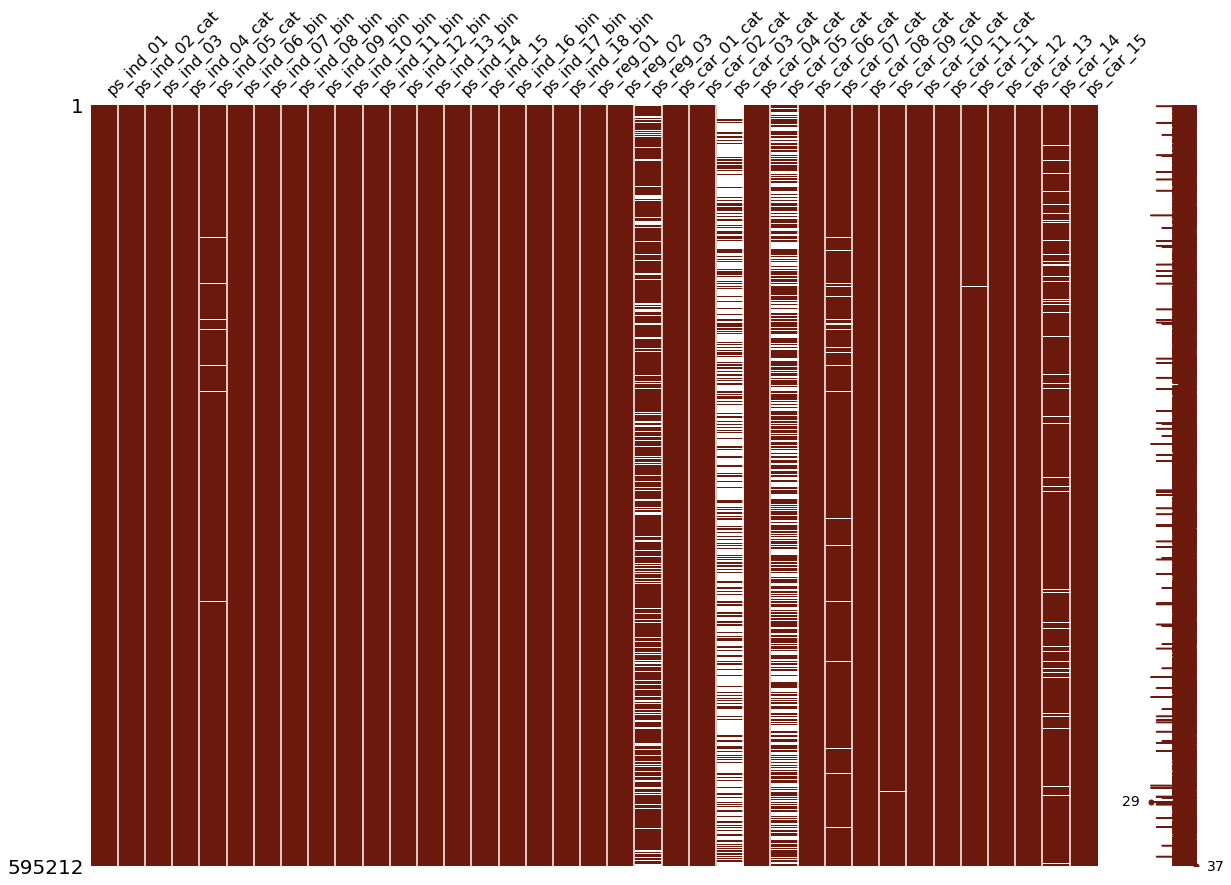

In [7]:
import missingno as msno

msno.matrix(df = train_copy.iloc[:, 2:39], figsize = (20,14), color =(0.42, 0.1, 0.05))

###  Target Variable inspection

In [8]:
data = [go.Bar(x = train['target'].value_counts().index.values, 
       y = train['target'].value_counts().values,
       text = 'Distribution of target variable')]
        
layout = go.Layout(title = 'Target variable distribution')
        
fig = go.Figure(data = data, layout = layout)
py.iplot(fig, filename = 'basic-bar')

the target variable is rather imbalanced so it might be something to keep in mind. An imbalanced target will prove quite

### Datatype check

In [9]:
Counter(train.dtypes.values)

Counter({dtype('int64'): 49, dtype('float64'): 10})

In [10]:
train_float = train.select_dtypes(include = ['float64'])
train_int = train.select_dtypes(include = ['int64'])

## Correlation plots

### Correlation of float features

<AxesSubplot:title={'center':'Pearson Correlation of continuous features'}>

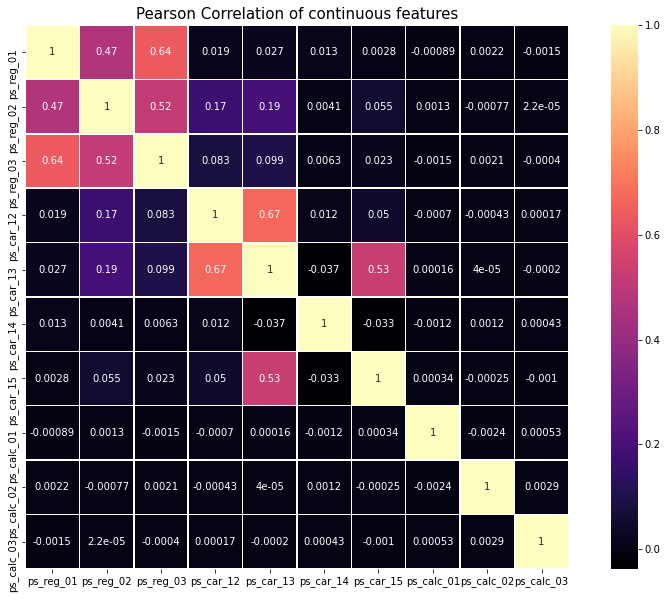

In [11]:
colormap = plt.cm.magma

plt.figure(figsize = (15,10))
plt.title('Pearson Correlation of continuous features', size = 15)
sns.heatmap(train_float.corr(), linewidths= 0.5, vmax = 1.0, square= True, cmap = colormap, linecolor = 'white', annot = True)

{ps_reg_01, ps_reg_03}

{ps_reg_02, ps_reg_03}

{ps_car_12, ps_car_13}

{ps_car_13, ps_car_15}

### Correlation of integer features

In [12]:
data = [go.Heatmap(z = train_int.corr().values,
       x = train_int.columns.values,
       y = train_int.columns.values,
       colorscale = 'Portland',
       reversescale = False,
       #text = True,
       opacity = 1.0)]

layout = go.Layout(title = 'Pearson Correalation of Integer type features',
                 xaxis = dict(ticks = '', nticks = 36),
                  yaxis = dict(ticks = ''),
                  width = 900, height = 700)
fig = go.Figure(data = data, layout = layout)
py.iplot(fig, filename = 'labelled-heatmap')

### Mutual Information plots

In [13]:
mf = mutual_info_classif(train_float.values, train['target'].values, n_neighbors=3, random_state = 17)
print(mf)

[0.01402035 0.00431986 0.0055185  0.00778454 0.00157233 0.00197537
 0.01226    0.00553038 0.00545101 0.00562139]


## Binary features inspection

In [14]:
bin_col = [col for col in train.columns if '_bin' in col]
zero_list = []
one_list = []

for col in bin_col:
    zero_list.append((train[col] == 0).sum())
    one_list.append((train[col] == 1).sum())

In [15]:
trace1 = go.Bar(x = bin_col, y = zero_list, name = 'Zero count')

trace2 = go.Bar(x = bin_col, y = one_list, name = 'One count')

data = [trace1, trace2]
layout = go.Layout(barmode = 'stack', title = 'Count of 1 and 0 in binary variables')

fig = go.Figure(data = data, layout = layout)
py.iplot(fig, filename = 'stacked-plot')

In [16]:
cat_col = [col for col in train.columns if '_cat' in col]

def plot_cat(data):
    for col in cat_col:
        plt.figure
        fig, ax = plt.subplots(figsize = (8,8))
        
        if col != 'ps_car_11_cat':
            cat_percent =  train[[col, 'target']].groupby(col, as_index = False).mean()
            cat_percent.sort_values('target', ascending = False, inplace = True)

            cat_size = train[col].value_counts().reset_index(drop = False)
            cat_size.columns = [col, 'count']

            cat_percent = cat_percent.merge(cat_size, on = col, how = 'left')

            sns.barplot(ax = ax, x = col, y = 'target', data = cat_percent, order = cat_percent[col])
        
        else:
            cat_percent =  train[[col, 'target']].groupby(col, as_index = False).mean()
            cat_percent.sort_values('target', ascending = False, inplace = True)

            cat_size = train[col].value_counts().reset_index(drop = False)
            cat_size.columns = [col, 'count']
            cat_percent = cat_percent.merge(cat_size, on = col, how = 'left')[:20]
            
            sns.barplot(ax = ax, x = col, y = 'target', data = cat_percent, order = cat_percent[col])
    plt.show()

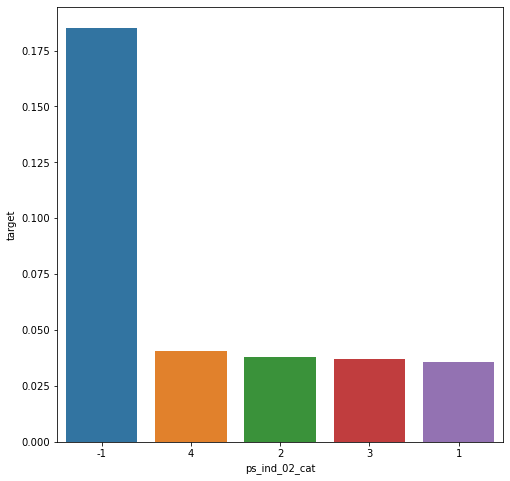

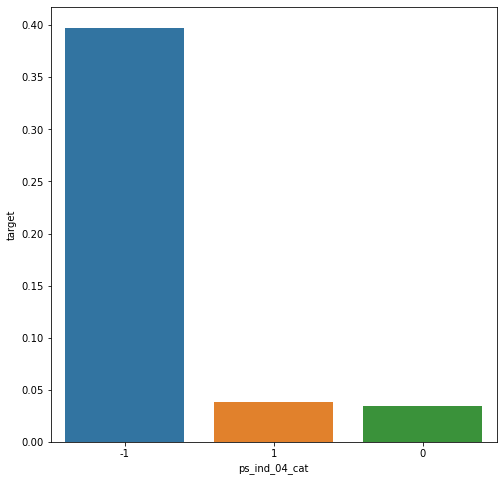

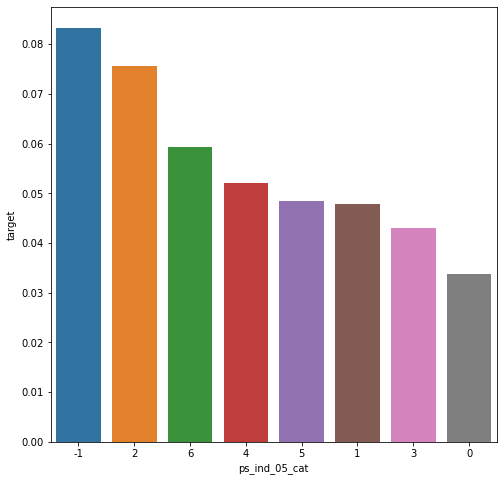

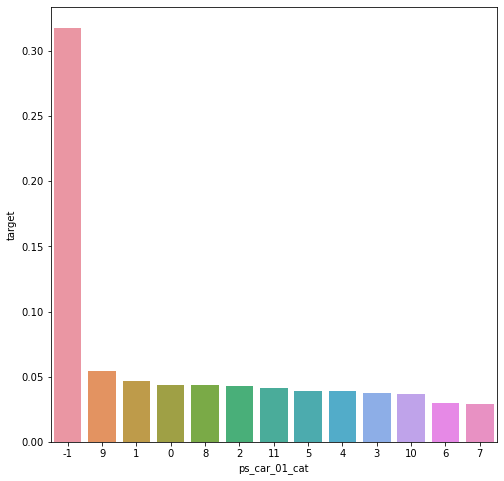

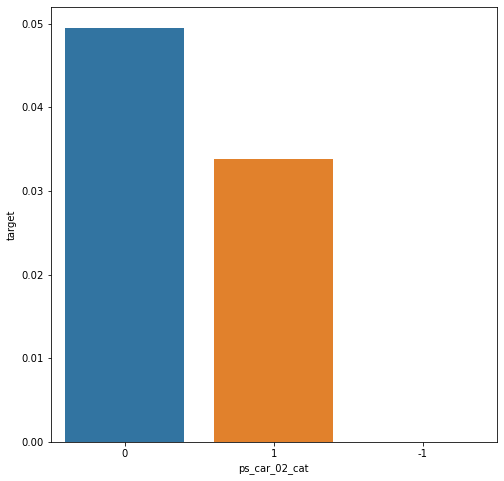

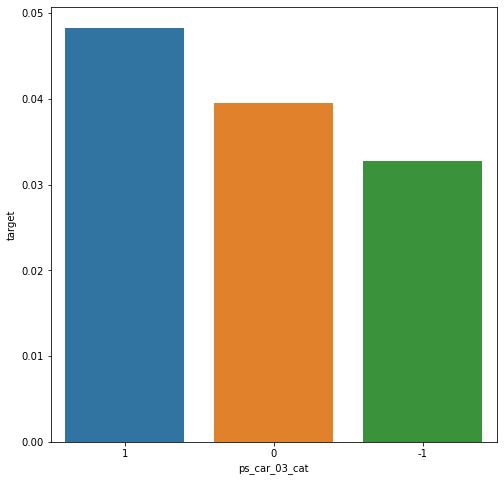

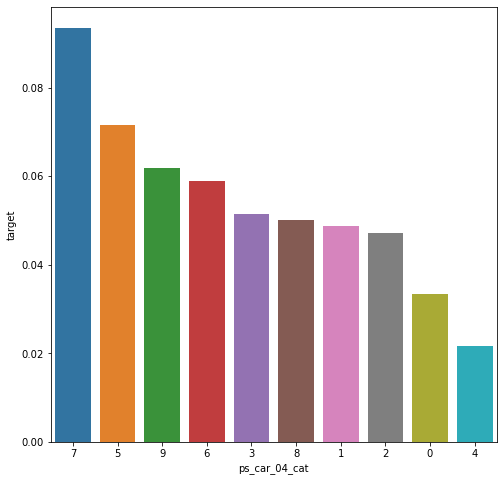

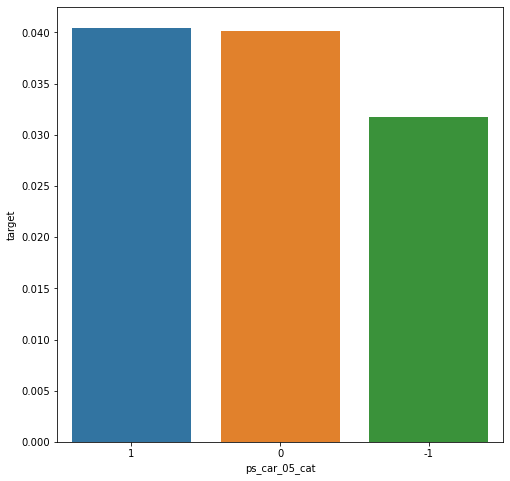

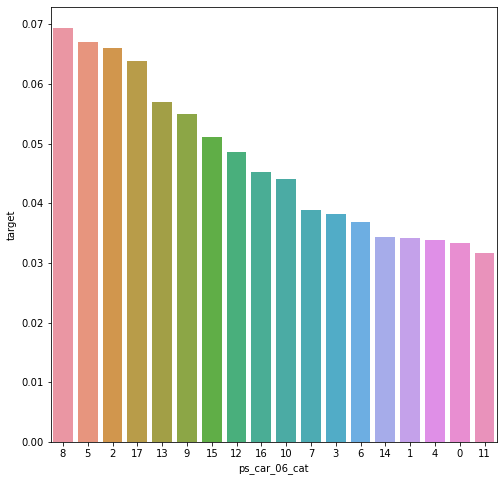

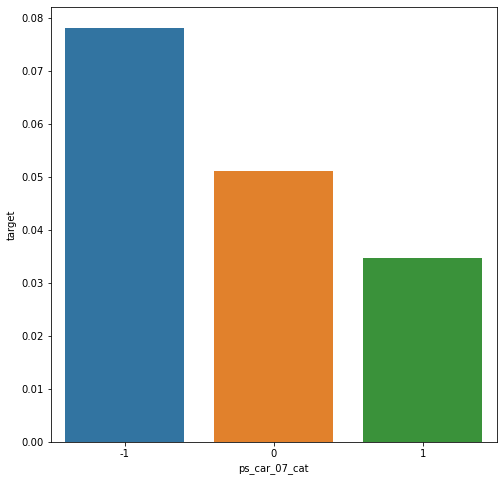

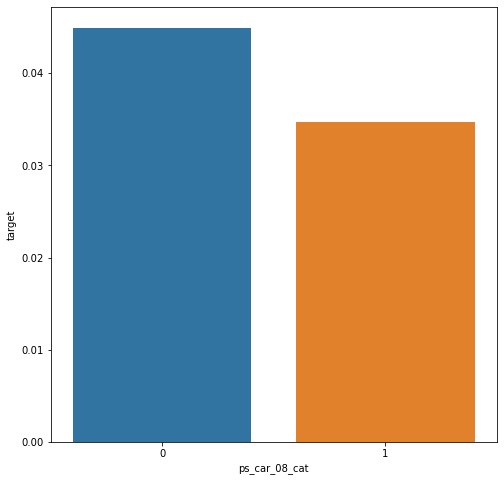

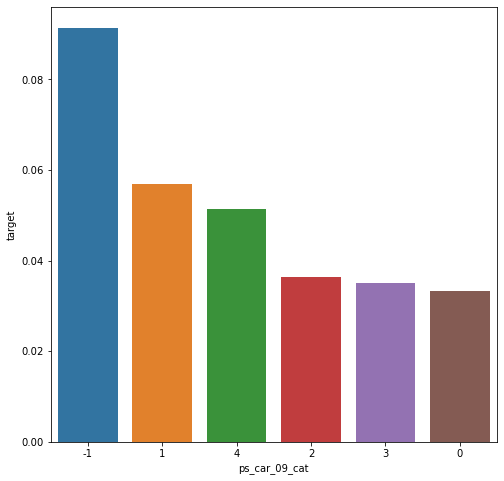

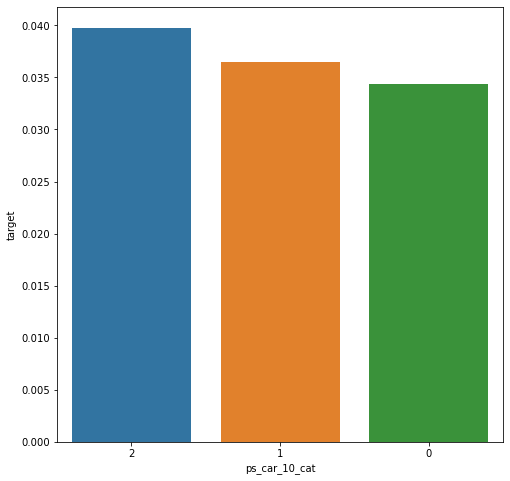

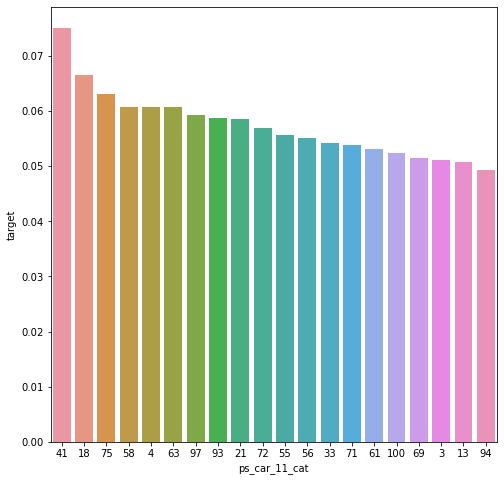

In [17]:
plot_cat(train[cat_col])

## Feature Importance via Random Forest

In [18]:
from sklearn.ensemble import RandomForestClassifier

X_features = train.drop(['id', 'target'], axis = 1)
y_target = train['target']

rf = RandomForestClassifier(n_estimators=100, max_depth = 8, min_samples_leaf=4, max_features = 0.2, n_jobs = -1, random_state = 0)
rf.fit(X_features, y_target)

features = X_features.columns.values
print('----Training  Done-----')

----Training  Done-----


### Plot.ly Scatter Plot of feautre importances

In [19]:
trace = go.Scatter(y = rf.feature_importances_,
                   x = features, 
                   mode = 'markers',
                  marker = dict(sizemode = 'diameter', sizeref = 1, size = 13, color = rf.feature_importances_, colorscale = 'Portland', showscale = True),
                  text = features)
data = [trace]

layout = go.Layout(autosize = True,
                  title = 'Random Forest Feature Importance',
                  hovermode = 'closest',
                  xaxis = dict(ticklen = 5, showgrid = False, zeroline = False, showline = False),
                  yaxis = dict(title = 'Feature Importance', showgrid = False, zeroline = False, ticklen = 5, gridwidth = 2),
                  showlegend = False)

fig = go.Figure(data = data, layout = layout)
py.iplot(fig, filename = 'scatter2010')

In [22]:
x, y = (list(x) for x in zip(*sorted(zip(rf.feature_importances_, features),
                                    reverse = False)))
trace2 = go.Bar(x = x,
                y = y, 
                marker = dict(color = x ,
                             colorscale = 'Viridis', 
                             reversescale = True),
               name = 'Random Forest Feature importance',
               orientation = 'h')

layout = dict(title = 'Barplot of Feature Importance',
             width = 900, height = 2000,
             yaxis = dict(showgrid = False,
                         showline = False,
                         showticklabels = True))

fig1 = go.Figure(data = [trace2])
fig1['layout'].update(layout)
py.iplot(fig1, filename = 'plots')

### Decision Tree Visualisation

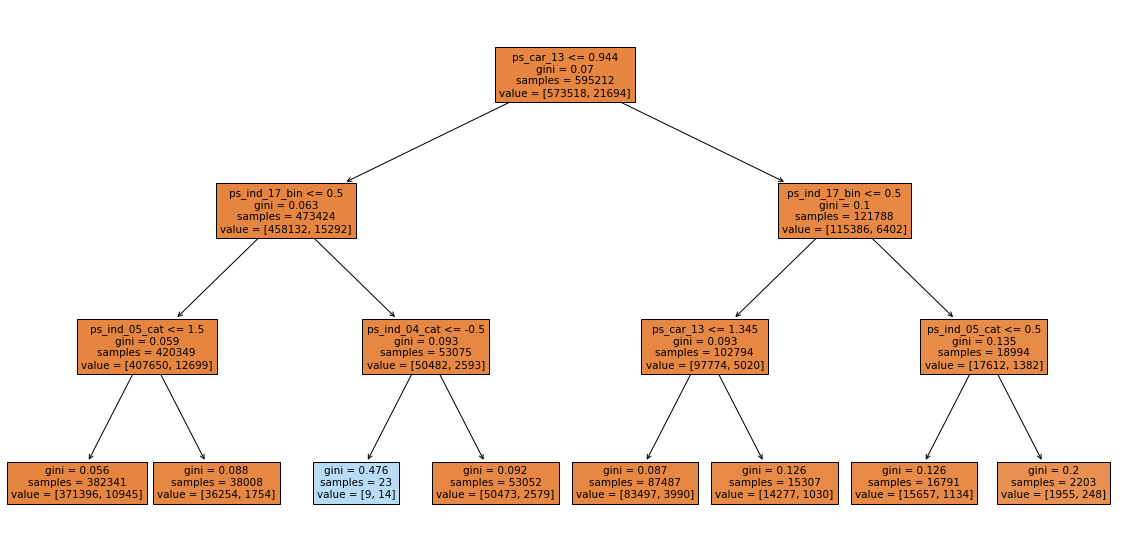

In [23]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree

decision_tree = DecisionTreeClassifier(max_depth = 3)
decision_tree.fit(X_features, y_target)

plt.figure(figsize = (20,10))
tree = plot_tree(decision_tree, filled = True, feature_names = X_features.columns)

## Feature Importance via Gradient Boosting model

In [31]:
from sklearn.ensemble import GradientBoostingClassifier

gb = GradientBoostingClassifier(n_estimators=100, max_depth = 3, min_samples_leaf=4, max_features = 0.2, random_state = 0)
gb.fit(X_features, y_target)

features = train.drop(['id', 'target'], axis = 1).columns.values
print('-----Training Done-----')

-----Training Done-----


In [33]:
# Scatter plot

trace = go.Scatter(y = gb.feature_importances_,
                  x = features,
                  mode = 'markers',
                  marker = dict(sizemode= 'diameter', 
                                sizeref = 1, 
                                size = 13, 
                                color = gb.feature_importances_, 
                                colorscale = 'Portland',
                               showscale = True),
                  text = features)

data = [trace]

layout = go.Layout(autosize = True,
                  title = 'Gradient Boosting Marchine Feature Importance',
                  hovermode = 'closest',
                  xaxis = dict(ticklen = 5, 
                              showgrid = False,
                              zeroline = False,
                              showline = False),
                  yaxis = dict(title = 'Feature Importnace',
                              showgrid = False,
                              zeroline = False,
                              ticklen = 5,
                              gridwidth = 2),
                  showlegend = False)

fig = go.Figure(data = data, layout = layout)
py.iplot(fig, filename = 'scatter2010')

In [37]:
x, y = (list(x) for x in zip(*sorted(zip(gb.feature_importances_, features),
                                  reverse = False)))

trace2 = go.Bar(x = x, 
               y = y,
               marker = dict(color =x,
                            colorscale = 'Viridis',
                            reversescale = True),
               name = 'Gradient Boosting Classifier Feature importance',
               orientation = 'h')

layout = dict(title = 'Barplot of Feature importances',
              width = 900, 
              height = 2000, 
              yaxis = dict(showgrid = False, showline = False, showticklabels = True))

fig1 = go.Figure(data = [trace2])
fig1['layout'].update(layout)

py.iplot(fig1, filename = 'plots')